# **Project Name:** Petrol Price Forecasting  using Tensor Flow

## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.
### In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

**Importing Libraries & Dataset**

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
file_path = "/Users/bilaldilbar/Documents/GeorgeBrown/Projects/Petrol Price Forecasting/Dataset/train_data.csv"
petrolprice_df = pd.read_csv(file_path)
petrolprice_df.head(10)

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
5,7/14/2003,74.21
6,7/21/2003,75.07
7,7/28/2003,75.10
8,8/4/2003,75.12
9,8/11/2003,75.44


In [22]:
petrolprice_df.rename(columns={"Petrol (USD)": "Petrol"}, inplace=True)
petrolprice_df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis**

In [23]:
petrolprice_df.shape

(813, 2)

In [24]:
petrolprice_df.info

<bound method DataFrame.info of            Date  Petrol
0      6/9/2003   74.59
1     6/16/2003   74.47
2     6/23/2003   74.42
3     6/30/2003   74.35
4      7/7/2003   74.28
..          ...     ...
808   12/3/2018  124.30
809  12/10/2018  122.37
810  12/17/2018  121.02
811  12/24/2018  120.61
812  12/31/2018  120.18

[813 rows x 2 columns]>

In [25]:
petrolprice_df.describe()

,Petrol
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


In [26]:
petrolprice_df.dtypes

Date       object
Petrol    float64
dtype: object

In [27]:
petrolprice_df.isnull().sum()

Date      0
Petrol    2
dtype: int64

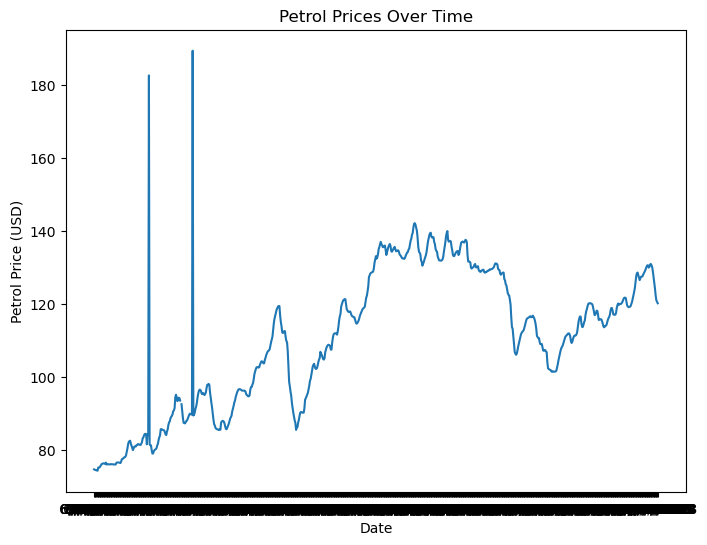

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(petrolprice_df['Date'], petrolprice_df['Petrol'])
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

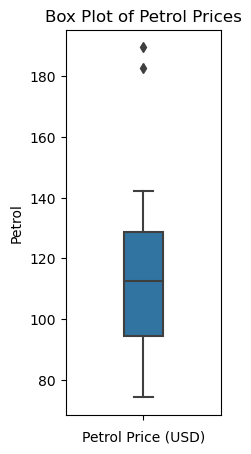

In [29]:
plt.figure(figsize=(2, 5))
sns.boxplot(y=petrolprice_df['Petrol'],  width=0.25)
plt.title('Box Plot of Petrol Prices')
plt.xlabel('Petrol Price (USD)')
plt.show()

**Data Imputation**

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [31]:
imputer = IterativeImputer(max_iter=10, random_state=0)
petrolprice_df['Petrol'] = imputer.fit_transform(petrolprice_df[['Petrol']])
petrolprice_df.isna().sum()

Date      0
Petrol    0
dtype: int64

**Removing Outliers**

In [32]:
from sklearn.ensemble import IsolationForest

In [33]:
model = IsolationForest(contamination=0.05)
petrolprice_df['Outlier'] = model.fit_predict(petrolprice_df[['Petrol']])
petrolprice_df = petrolprice_df[petrolprice_df['Outlier'] != -1]

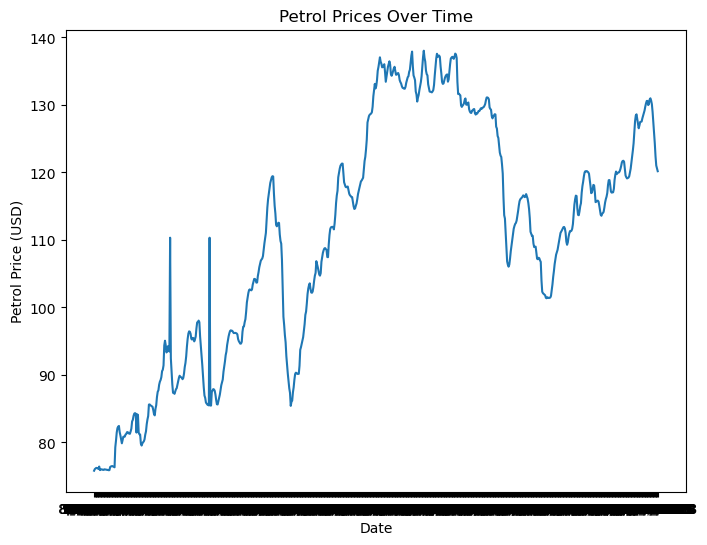

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(petrolprice_df['Date'], petrolprice_df['Petrol'])
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

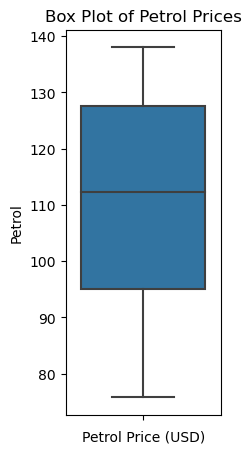

In [35]:
plt.figure(figsize=(2, 5))
sns.boxplot(y=petrolprice_df['Petrol'])
plt.title('Box Plot of Petrol Prices')
plt.xlabel('Petrol Price (USD)')
plt.show()

In [36]:
petrolprice_df=petrolprice_df.reset_index()['Petrol']
petrolprice_df.head()

0    75.81
1    76.05
2    76.13
3    76.23
4    76.20
Name: Petrol, dtype: float64

**Data Scaling**

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
petrolprice_df = scaler.fit_transform(np.array(petrolprice_df).reshape(-1,1))

In [39]:
petrolprice_df

array([[0.        ],
       [0.00385728],
       [0.00514304],
       [0.00675024],
       [0.00626808],
       [0.00546448],
       [0.00433944],
       [0.00996464],
       [0.00144648],
       [0.00385728],
       [0.00305368],
       [0.00305368],
       [0.00208936],
       [0.00192864],
       [0.00337512],
       [0.00305368],
       [0.00257152],
       [0.0024108 ],
       [0.00176792],
       [0.00208936],
       [0.00112504],
       [0.00144648],
       [0.0088396 ],
       [0.01012536],
       [0.01076824],
       [0.01108968],
       [0.01012536],
       [0.00916104],
       [0.00819672],
       [0.05576985],
       [0.07216329],
       [0.09128897],
       [0.10157506],
       [0.1051109 ],
       [0.10655738],
       [0.09209257],
       [0.08405657],
       [0.07393121],
       [0.06525233],
       [0.07280617],
       [0.08084217],
       [0.08132433],
       [0.08116361],
       [0.08630665],
       [0.08743169],
       [0.09161041],
       [0.09193185],
       [0.089

**Splitting The Data**

In [40]:
training_size = int(len(petrolprice_df) * 0.65)
test_size = len(petrolprice_df) - training_size
train_data, test_data = petrolprice_df[0:training_size,:], petrolprice_df[training_size:len(petrolprice_df), :1]

In [41]:
train_data.shape

(501, 1)

In [42]:
test_data.shape

(271, 1)

**Data Pre-Processing**

In [43]:
def create_dataset(dataset, time_step=1):
    dataX = [dataset[i:(i+time_step), 0] for i in range(len(dataset)-time_step-1)]
    dataY = [dataset[i + time_step, 0] for i in range(len(dataset)-time_step-1)]
    return np.array(dataX), np.array(dataY)

In [44]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [45]:
X_train

array([[0.        , 0.00385728, 0.00514304, ..., 0.30954677, 0.29893925,
        0.28158149],
       [0.00385728, 0.00514304, 0.00675024, ..., 0.29893925, 0.28158149,
        0.28447445],
       [0.00514304, 0.00675024, 0.00626808, ..., 0.28158149, 0.28447445,
        0.29636773],
       ...,
       [0.96785599, 0.94905175, 0.92606879, ..., 0.99308904, 0.99099968,
        0.98264224],
       [0.94905175, 0.92606879, 0.93812279, ..., 0.99099968, 0.98264224,
        0.92558663],
       [0.92606879, 0.93812279, 0.95081967, ..., 0.98264224, 0.92558663,
        0.89697846]])

In [46]:
y_train

array([0.28447445, 0.29636773, 0.29459981, 0.28383157, 0.55481326,
       0.26775956, 0.23657988, 0.20572163, 0.18547091, 0.18547091,
       0.18306011, 0.18884603, 0.19398907, 0.19639987, 0.20491803,
       0.21215043, 0.22082932, 0.22613308, 0.22372228, 0.22243652,
       0.22163292, 0.21793635, 0.22082932, 0.2311154 , 0.24670524,
       0.25666988, 0.27258116, 0.29604629, 0.31404693, 0.32658309,
       0.33188685, 0.33076181, 0.32610093, 0.31420765, 0.31227901,
       0.31629701, 0.31549341, 0.30793957, 0.31276117, 0.31951141,
       0.33863709, 0.3531019 , 0.3539055 , 0.35744134, 0.35374478,
       0.32031501, 0.29877853, 0.27434908, 0.25184828, 0.22452588,
       0.19913211, 0.17904211, 0.17341691, 0.16232723, 0.15959499,
       0.15734491, 0.15638059, 0.15557698, 0.55481326, 0.15525554,
       0.15509482, 0.18691739, 0.19109611, 0.19431051, 0.19350691,
       0.19045323, 0.18145291, 0.16827387, 0.15830923, 0.15766635,
       0.16570235, 0.17341691, 0.18097075, 0.19173899, 0.20363

In [47]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [48]:
X_train.shape

(400, 100, 1)

In [49]:
X_test.shape

(170, 100, 1)

**LSTM Model Building**

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [51]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 

In [53]:
# custom_learning_rate = 0.0001
# custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [54]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

In [55]:
history = model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs = 200, 
                    batch_size = 128, verbose=1)

Epoch 1/200
4/4 [==============================] - 2s 267ms/step - loss: 0.4374 - mean_squared_error: 0.4374 - mean_absolute_error: 0.5816 - val_loss: 0.1601 - val_mean_squared_error: 0.1601 - val_mean_absolute_error: 0.3863
Epoch 2/200
4/4 [==============================] - 1s 137ms/step - loss: 0.0931 - mean_squared_error: 0.0931 - mean_absolute_error: 0.2425 - val_loss: 0.0767 - val_mean_squared_error: 0.0767 - val_mean_absolute_error: 0.2671
Epoch 3/200
4/4 [==============================] - 1s 134ms/step - loss: 0.0794 - mean_squared_error: 0.0794 - mean_absolute_error: 0.2436 - val_loss: 0.0098 - val_mean_squared_error: 0.0098 - val_mean_absolute_error: 0.0758
Epoch 4/200
4/4 [==============================] - 1s 141ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - mean_absolute_error: 0.1200 - val_loss: 0.0290 - val_mean_squared_error: 0.0290 - val_mean_absolute_error: 0.1525
Epoch 5/200
4/4 [==============================] - 1s 144ms/step - loss: 0.0401 - mean_squared_error

4/4 [==============================] - 1s 139ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - mean_absolute_error: 0.0755 - val_loss: 0.0029 - val_mean_squared_error: 0.0029 - val_mean_absolute_error: 0.0447
Epoch 38/200
4/4 [==============================] - 1s 145ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0738 - val_loss: 0.0029 - val_mean_squared_error: 0.0029 - val_mean_absolute_error: 0.0438
Epoch 39/200
4/4 [==============================] - 1s 140ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - mean_absolute_error: 0.0733 - val_loss: 0.0029 - val_mean_squared_error: 0.0029 - val_mean_absolute_error: 0.0457
Epoch 40/200
4/4 [==============================] - 1s 138ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0711 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - val_mean_absolute_error: 0.0441
Epoch 41/200
4/4 [==============================] - 1s 140ms/step - loss: 0.0090 - mean_squared_error: 0.0090

4/4 [==============================] - 1s 148ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - mean_absolute_error: 0.0591 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0336
Epoch 74/200
4/4 [==============================] - 1s 156ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0620 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0351
Epoch 75/200
4/4 [==============================] - 1s 151ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0626 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - val_mean_absolute_error: 0.0337
Epoch 76/200
4/4 [==============================] - 1s 153ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0606 - val_loss: 0.0027 - val_mean_squared_error: 0.0027 - val_mean_absolute_error: 0.0420
Epoch 77/200
4/4 [==============================] - 1s 145ms/step - loss: 0.0085 - mean_squared_error: 0.0085

4/4 [==============================] - 1s 154ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0664 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0328
Epoch 110/200
4/4 [==============================] - 1s 152ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0674 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0306
Epoch 111/200
4/4 [==============================] - 1s 149ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - mean_absolute_error: 0.0599 - val_loss: 0.0045 - val_mean_squared_error: 0.0045 - val_mean_absolute_error: 0.0578
Epoch 112/200
4/4 [==============================] - 1s 146ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0627 - val_loss: 0.0044 - val_mean_squared_error: 0.0044 - val_mean_absolute_error: 0.0568
Epoch 113/200
4/4 [==============================] - 1s 153ms/step - loss: 0.0064 - mean_squared_error: 0.

4/4 [==============================] - 1s 154ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - mean_absolute_error: 0.0567 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - val_mean_absolute_error: 0.0317
Epoch 146/200
4/4 [==============================] - 1s 148ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - mean_absolute_error: 0.0560 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - val_mean_absolute_error: 0.0434
Epoch 147/200
4/4 [==============================] - 1s 146ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - mean_absolute_error: 0.0572 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0351
Epoch 148/200
4/4 [==============================] - 1s 146ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0620 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0311
Epoch 149/200
4/4 [==============================] - 1s 139ms/step - loss: 0.0061 - mean_squared_error: 0.

4/4 [==============================] - 1s 153ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - mean_absolute_error: 0.0551 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0298
Epoch 182/200
4/4 [==============================] - 1s 150ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - mean_absolute_error: 0.0587 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - val_mean_absolute_error: 0.0402
Epoch 183/200
4/4 [==============================] - 1s 149ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0567 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - val_mean_absolute_error: 0.0397
Epoch 184/200
4/4 [==============================] - 1s 156ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - mean_absolute_error: 0.0550 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0308
Epoch 185/200
4/4 [==============================] - 1s 152ms/step - loss: 0.0059 - mean_squared_error: 0.

In [56]:
results = model.evaluate(X_test, ytest)
print("Mean Squared Error (MSE):", results[1])
print("Mean Absolute Error (MAE):", results[2])

6/6 [==============================] - 0s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0278
Mean Squared Error (MSE): 0.0012807711027562618
Mean Absolute Error (MAE): 0.027774345129728317


In [57]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

6/6 [==============================] - 0s 12ms/step


In [58]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [59]:
look_back = 100
trainPredictPlot = np.empty_like(petrolprice_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [60]:
testPredictPlot = np.empty_like(petrolprice_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1:len(petrolprice_df)-1, :] = test_predict

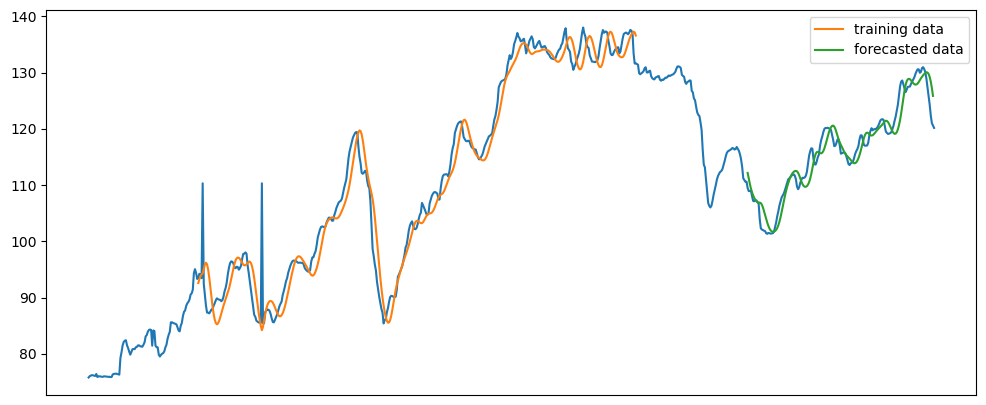

In [61]:
plt.figure(figsize=(12,5))
plt.plot(scaler.inverse_transform(petrolprice_df))
plt.plot(trainPredictPlot, label= "training data")
plt.plot(testPredictPlot, label= "forecasted data")
plt.xticks([])
plt.legend() 
plt.show()

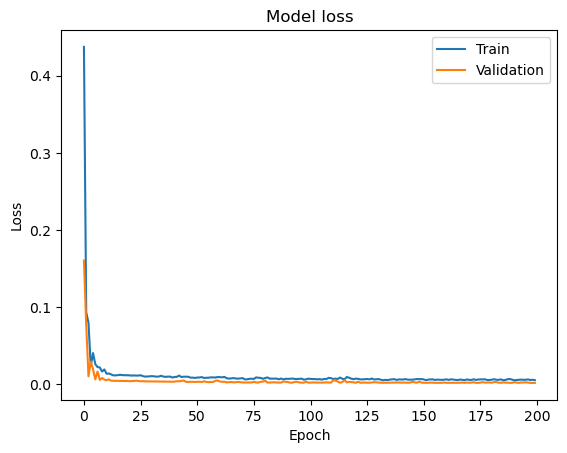

In [63]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()